In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel('Concrete_Data.xls')

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# renaming the columns

In [6]:
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_strength'}
df.rename(columns=columns,inplace=True)

In [8]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


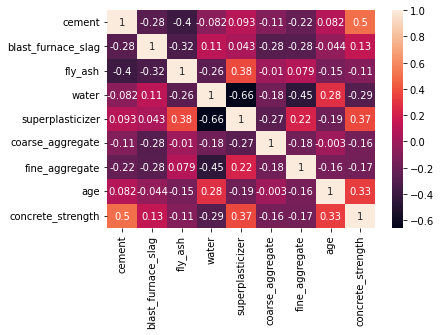

In [9]:
sns.heatmap(df .corr(), annot= True)
plt.show()

In [10]:
df.corr()['concrete_strength'].sort_values(ascending = False)

concrete_strength     1.000000
cement                0.497833
superplasticizer      0.366102
age                   0.328877
blast_furnace_slag    0.134824
fly_ash              -0.105753
coarse_aggregate     -0.164928
fine_aggregate       -0.167249
water                -0.289613
Name: concrete_strength, dtype: float64

In [16]:
df.isna().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
concrete_strength     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   concrete_strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [57]:
#test and train set preparation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test , y_train , y_test = train_test_split(df.drop('concrete_strength', axis=1) , df['concrete_strength'] , test_size=0.2, random_state= 0)

In [22]:
x_train.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
741,480.00,0.0,0.00,192.00,0.00,936.0,721.00,28
638,375.00,0.0,0.00,186.00,0.00,1038.0,758.00,28
993,303.60,139.9,0.00,213.50,6.20,895.5,722.50,28
279,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,3
796,500.00,0.0,0.00,200.00,0.00,1125.0,613.00,90


In [23]:
x_train.shape

(824, 8)

In [24]:
y_train

741    43.892042
638    38.210760
993    33.419591
279    13.120728
796    47.222211
         ...    
277    36.969703
763     6.267337
835    15.416683
559    39.435269
684    50.732334
Name: concrete_strength, Length: 824, dtype: float64

In [25]:
x_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
747,500.00,0.00,0.00,200.00,0.00,1125.00,613.00,3
718,122.60,183.90,0.00,203.50,0.00,958.20,800.10,7
175,362.60,189.00,0.00,164.90,11.60,944.70,755.80,91
828,522.00,0.00,0.00,146.00,0.00,896.00,896.00,28
713,157.00,236.00,0.00,192.00,0.00,935.40,781.20,3
...,...,...,...,...,...,...,...,...
624,307.00,0.00,0.00,193.00,0.00,968.00,812.00,28
987,162.00,190.10,148.10,178.80,18.80,838.10,741.40,28
424,173.54,50.05,173.53,164.77,6.47,1006.20,793.50,14
889,262.00,111.00,86.00,195.00,5.00,895.00,733.00,28


In [58]:
#Standardizing to single scle

In [21]:
scaler = StandardScaler()

In [26]:
scaler.fit_transform(x_train)

array([[ 1.91868907, -0.88106119, -0.84617062, ..., -0.46017401,
        -0.64350782, -0.2880169 ],
       [ 0.91475201, -0.88106119, -0.84617062, ...,  0.8520653 ,
        -0.18715656, -0.2880169 ],
       [ 0.23207481,  0.7044249 , -0.84617062, ..., -0.98121021,
        -0.62500709, -0.2880169 ],
       ...,
       [-1.29390952, -0.88106119,  1.86836615, ..., -0.37011837,
         0.87355179, -0.2880169 ],
       [-0.37984873,  3.19201743, -0.84617062, ..., -0.3881295 ,
        -1.3428353 , -0.2880169 ],
       [-0.83496687,  2.38284155, -0.84617062, ..., -0.53993758,
        -0.70394353,  0.71554384]])

In [27]:
x_train.shape

(824, 8)

In [28]:
scaler.fit_transform(x_test)

array([[ 2.04130194, -0.77191623, -0.85198746, ...,  1.90323569,
        -2.12764464, -0.61689118],
       [-1.60148994,  1.65444822, -0.85198746, ..., -0.24926945,
         0.32666329, -0.55832916],
       [ 0.71507088,  1.72173729, -0.85198746, ..., -0.423483  ,
        -0.25444757,  0.67147326],
       ...,
       [-1.10979991, -0.11155984,  1.95167682, ...,  0.37015649,
         0.24008695, -0.45584563],
       [-0.2559542 ,  0.69261044,  0.53748484, ..., -1.06484694,
        -0.55352945, -0.25087856],
       [-0.37178224, -0.77191623,  0.69404282, ..., -0.26656176,
         1.12775674, -0.61689118]])

In [29]:
x_test.shape

(206, 8)

In [59]:
#Linear regression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
lr.score(x_train,y_train)

0.6090710418548893

In [33]:
lr.score(x_test,y_test)

0.6368981103411095

In [60]:
#Extreme gradient boost regression

In [34]:
from xgboost import XGBRegressor

In [37]:
xgbr = XGBRegressor()

In [38]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [39]:
 xgbr.score(x_train,y_train)

0.9955814510079506

In [40]:
xgbr.score(x_test,y_test)

0.9349613481552524

In [61]:
#Lasso regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lsr = Lasso()

In [43]:
lsr.fit(x_train,y_train)

Lasso()

In [44]:
lsr.score(x_train,y_train)

0.608851959844887

In [45]:
lsr.score(x_test,y_test)

0.6380351738941824

In [62]:
#Ridge regression

In [46]:
from sklearn.linear_model import Ridge

In [47]:
rdg = Ridge()

In [48]:
rdg.fit(x_train,y_train)

Ridge()

In [49]:
rdg.score(x_train,y_train)

0.6090710418202221

In [50]:
rdg.score(x_test,y_test)

0.6368985034309388

In [63]:
#Random forest regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rfr = RandomForestRegressor()

In [54]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
rfr.score(x_train,y_train)

0.9853623192821798

In [56]:
rfr.score(x_test,y_test)

0.9197972208296532